# Problem Session 11
## A Concrete Strength Regression problem using Ensembles

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

##### EDA and preprocessing

We will work with the following dataset:

Yeh,I-Cheng. (2007). Concrete Compressive Strength. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.

1. Print the ReadMe file and read the variable descriptions.  The file is `Concrete_readme.txt` in this directory.
2. Load the data as a pandas DataFrame. The data is located in `../../data/concrete.csv`.
    * Note:  the last column `Concrete compressive strength(MPa, megapascals)` is our target variable and the rest are features.
3. Make a train/validation/test split.
4. Use `sns.pairplot` to visualize the relationship between each feature and the target.
    * Discussion question:  which of the following should you use for this visualization and why?
        * The training set
        * The combined training and validation set
        * The full training set
        * Only the validation set

In [2]:
#1.

with open('Concrete_Readme.txt') as readme:
    print(readme.read())

Concrete Compressive Strength 

---------------------------------

Data Type: multivariate
 
Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

---------------------------------

Sources: 

  Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511

  Date Donated: August 3, 2007
 
---------------------------------

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitat

In [3]:
#2.
df = pd.read_csv('../../data/concrete.csv')

#3.
## make a train test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                                    shuffle=True,
                                                    random_state=216,
                                                    test_size=.2)

## make a validation set
df_tt, df_val = train_test_split(df_train, 
                                                        shuffle=True,
                                                        random_state=216,
                                                        test_size=.2)

In [4]:
df_tt

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
622,307.0,0.0,0.0,193.0,0.0,968.0,812.0,365,36.15
632,325.0,0.0,0.0,184.0,0.0,1063.0,783.0,28,30.57
814,310.0,0.0,0.0,192.0,0.0,970.0,850.0,360,38.11
950,326.5,0.0,137.9,199.0,10.8,801.1,792.5,28,38.63
83,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
...,...,...,...,...,...,...,...,...,...
811,310.0,0.0,0.0,192.0,0.0,970.0,850.0,28,27.92
990,151.8,178.1,138.7,167.5,18.3,944.0,694.6,28,36.35
860,314.0,0.0,113.0,170.0,10.0,925.0,783.0,28,38.46
271,231.8,0.0,121.6,174.0,6.7,1056.4,778.5,28,33.73


In [5]:
features = df.columns[:-1]
target = df.columns[-1]

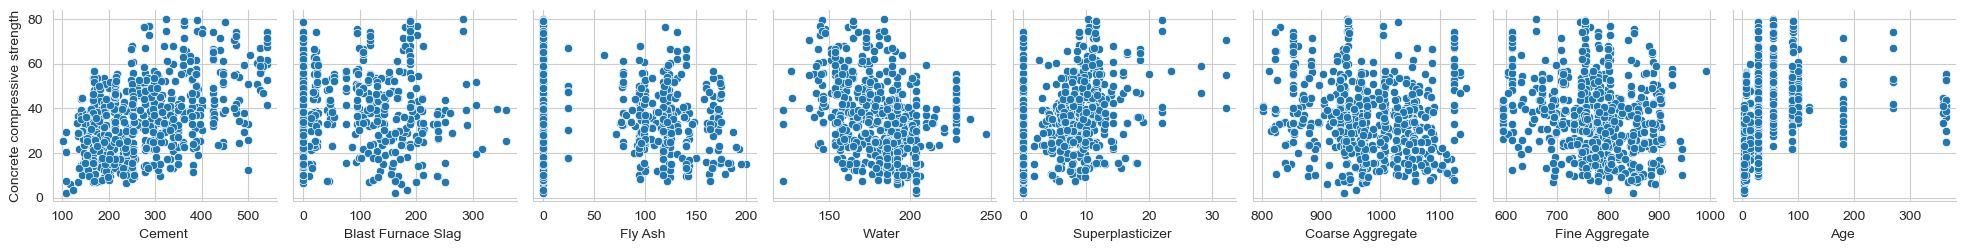

In [6]:
#4.

g = sns.pairplot(df_tt, x_vars=features, y_vars=target)
names = df.columns.map(lambda t: t.split('(')[0])
for i in range(8):
    g.axes[0,i].xaxis.set_label_text(names[i])
    g.axes[0,i].yaxis.set_label_text(names[8])
plt.show()

##### Model Selection

Train each of the following models on the training set using their default parameters. Which has the smallest "out of the box" mean squared error?

* Linear Regression
* kNN
* Support Vector Machine Regressor
* Random Forest Regressor
* AdaBoost Regressor
* Gradient Boosting Regressor
* XGBoost Regressor

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

In [8]:
models = {
    'lr': LinearRegression(),
    'svr': SVR(),
    'knr': KNeighborsRegressor(n_neighbors=10),
    'rf': RandomForestRegressor(),
    'ab': AdaBoostRegressor(),
    'gb': GradientBoostingRegressor(),
    'xbg': XGBRegressor()
}

In [9]:
mses = {}
for name, model in models.items():
    model.fit(df_tt[features],df_tt[target])
    mses[name] = mean_squared_error(df_val[target], model.predict(df_val[features]))

In [10]:
mses

{'lr': 96.17420404610411,
 'svr': 209.27443036524824,
 'knr': 92.28225276969698,
 'rf': 36.667465074768536,
 'ab': 60.41131432704728,
 'gb': 37.4697587127209,
 'xbg': 32.90733200110821}

##### Hyperparameter tuning and test set evaluation

Select the model which had the lowest MSE "right out of the box".  Do cross validation hyperparameter tuning on the combined training and validation set.  Note that if you make your grid of hyperparameters too large it might take a very long time to run.

Once you obtain the hyperparameters with the best cross validation performance, train the model with those hyperparameters on the combined training and validation set.

Evaluate performance on the test set.  Is it comparable to your training set performance?

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": np.arange(100,800,100),
              "learning_rate": [0.01, 0.1, 1]}

In [13]:
xgb_reg = XGBRegressor()

In [14]:
# Note:  this took about 3 minutes to run on my 2023 MacBook Pro.
search = GridSearchCV(xgb_reg, param_grid, cv=5).fit(df_train[features], df_train[target])

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 700}


In [15]:
xgb_reg = XGBRegressor(**search.best_params_)

In [16]:
xgb_reg.fit(df_train[features], df_train[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
mean_squared_error(df_test[target],xgb_reg.predict(df_test[features]))

11.402388974649856

Discussion Prompt:  A construction company is building a bridge and contracted out the specs to an engineer.  The engineer told them they needed to ensure that the concrete compressive strength is at least $50 \textrm{ MPa}$ given the design constraints.  According to your model, the particular mix they are using is predicted to be $60 \textrm{ MPa}$.

Discuss this situation from a technical, ethical, and legal perspective.  Who else would you want to loop into this conversation?

Do a little further model assessment to see what the risk is.  For example, are there any instances where the model predicted strength in excess of $55 \textrm{ MPa}$ but the actual strength was less than $50 \textrm{ MPa}$?  What else could you do to assess the risk here?

In [18]:
df['preds'] = xgb_reg.predict(df[features])

In [19]:
df[df.preds > 55].sort_values(target)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",preds
138,337.9,189.0,0.0,174.9,9.5,944.7,755.8,28,49.90,57.246658
484,446.0,24.0,79.0,162.0,10.3,967.0,712.0,56,54.77,55.277664
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.90,55.006680
459,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,100,55.02,55.959930
147,388.6,97.1,0.0,157.9,12.1,852.1,925.7,56,55.20,55.185753
...,...,...,...,...,...,...,...,...,...,...
159,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.40,79.305260
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,79.788383
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20,80.080627
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75,81.847939


Out of $139$ instances where the model predicts that the strength is greater than $55$, only one had strength less than $50$ and even that was very close at $49.9$.  There are no examples of obtaining a strength of less than $50$ when the prediction was $60$ or higher.  While this shouldn't give us complete confidence that their mix meets the requirement it is pretty strong evidence.